In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import numpy as py

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  
0      0         A/5 21171   7.2500  
1      0          PC 17599  71.2833  
2      0  STON/O2. 3101282   7.9250  
3      0            113803  53.1000  
4      0            373450   8.0500  


In [3]:
print("Missing Values:\n", df.isnull().sum())  # چک کردن داده‌های گمشده
mean_age = df['Age'].mean()
std_age = df['Age'].std()
print(f"Mean Age: {mean_age:.2f}, Std Age: {std_age:.2f}")

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
Mean Age: 29.70, Std Age: 14.53


In [4]:
df['Age'].fillna(mean_age, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  #    male=0   and  female=1
# چک کردن دوباره
print("Missing Values After:\n", df.isnull().sum())  # Age: 0

Missing Values After:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


C:\Users\Hanieh\AppData\Local\Temp\ipykernel_8108\2257064680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [5]:
# درصد زنده‌ماندن به تفکیک جنسیت
survived_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Rate by Sex:\n", survived_by_sex)

Survival Rate by Sex:
 Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


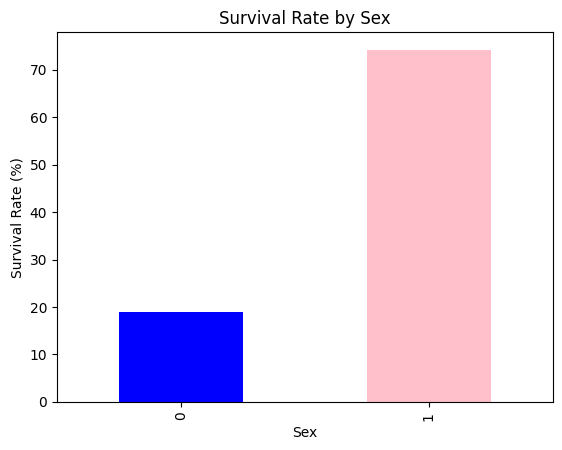

In [6]:
survived_by_sex.plot(kind='bar', title='Survival Rate by Sex', color=['blue', 'pink'])
plt.ylabel('Survival Rate (%)')
plt.show()

In [7]:
# انتخاب ویژگی‌ها
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
y = df['Survived']

In [8]:
print("X (Features):\n", X.head())
print("y (Target):\n", y.head())

X (Features):
    Pclass  Sex   Age     Fare
0       3    0  22.0   7.2500
1       1    1  38.0  71.2833
2       3    1  26.0   7.9250
3       1    1  35.0  53.1000
4       3    0  35.0   8.0500
y (Target):
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [11]:
#  ساخت و ارزیابی مدل
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

Precision: 0.76, Recall: 0.70
